In [4]:
import numpy as np
import matplotlib.pyplot as plt
def f1(x1,x2):
    return (x1**2+x1*x2-10)
def f2(x1,x2):
    return (x2+3*x1*x2**2-57)
def partial_diff(x1,x2,dx,f,variable):     #define a function to calculate partial differential 
    if variable == 'x1':                   #variable= 'x1' or 'x2'
        diff=(f(x1+dx/2.,x2)-f(x1-dx/2.,x2))/dx
    if variable == 'x2':
        diff=(f(x1,x2+dx/2.)-f(x1,x2-dx/2.))/dx
    return diff
#diff=partial_diff(1,2,1e-6,f1,'x2')

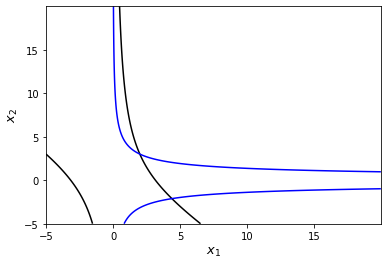

In [5]:
#Always good to plot the function first
x1=np.arange(-5,20,0.01)
x2=np.arange(-5,20,0.01)
X1,X2 = np.meshgrid(x1,x2)
F_1=f1(X1,X2)
F_2=f2(X1,X2)
plt.contour(X1,X2,F_1,0,colors='k')
plt.contour(X1,X2,F_2,0,colors='b')
plt.xlabel(r'$x_1$',fontsize=13)
plt.ylabel(r'$x_2$',fontsize=13)
plt.show()

In [6]:
#############initial condition####################
x1=1.0
x2=1.0     #change the initial guess, get different final results (totally two solutions, as shown in the figure above). 
##################################################
Nmax=100     #maximum loop number
dx=1e-5
eps=1e-5     #accuracy 
#################################################
for i in range(0,Nmax):
    a=partial_diff(x1, x2, dx, f1, 'x1')
    b=partial_diff(x1, x2, dx, f1, 'x2')
    c=partial_diff(x1, x2, dx, f2, 'x1')
    d=partial_diff(x1, x2, dx, f2, 'x2')
    f_1=f1(x1,x2)
    f_2=f2(x1,x2)
    delta_x1=(b*f_2 - d*f_1)/(a*d-b*c)
    delta_x2=(c*f_1 - a*f_2)/(a*d-b*c)
    
    x1=x1+delta_x1
    x2=x2+delta_x2
    if np.abs(f1(x1,x2)) < eps and np.abs(f2(x1,x2)) < eps:
        print('The solution is','x1=',x1,'x2=',x2)
        break

The solution is x1= 1.9999998110161499 x2= 3.000000058050815


In [7]:
#############initial condition####################
x1=6.0
x2=-1.0     #change the initial guess, get different final results (totally two solutions, as shown in the figure above). 
##################################################
Nmax=100     #maximum loop number
dx=1e-5
eps=1e-5     #accuracy 
#################################################
for i in range(0,Nmax):
    a=partial_diff(x1, x2, dx, f1, 'x1')
    b=partial_diff(x1, x2, dx, f1, 'x2')
    c=partial_diff(x1, x2, dx, f2, 'x1')
    d=partial_diff(x1, x2, dx, f2, 'x2')
    f_1=f1(x1,x2)
    f_2=f2(x1,x2)
    delta_x1=(b*f_2 - d*f_1)/(a*d-b*c)
    delta_x2=(c*f_1 - a*f_2)/(a*d-b*c)
    
    x1=x1+delta_x1
    x2=x2+delta_x2
    if np.abs(f1(x1,x2)) < eps and np.abs(f2(x1,x2)) < eps:
        print('The solution is','x1=',x1,'x2=',x2)
        break
#print(f1(1,1))

The solution is x1= 4.393744194991157 x2= -2.1177810159520742


In [10]:
#find all the solutions in x1~[x1_low,x2_up], x2~[x2_low,x2_up]
x1_range=[-10.,10.]
x2_range=[-10.,10.]

solution=[]
for x1 in np.arange(x1_range[0],x1_range[1],1.):
    for x2 in np.arange(x2_range[0],x2_range[1],1.):
        for i in range(0,Nmax):
            a=partial_diff(x1, x2, dx, f1, 'x1')
            b=partial_diff(x1, x2, dx, f1, 'x2')
            c=partial_diff(x1, x2, dx, f2, 'x1')
            d=partial_diff(x1, x2, dx, f2, 'x2')
            f_1=f1(x1,x2)
            f_2=f2(x1,x2)
            delta_x1=(b*f_2 - d*f_1)/(a*d-b*c)
            delta_x2=(c*f_1 - a*f_2)/(a*d-b*c)
    
            x1=x1+delta_x1
            x2=x2+delta_x2
            if np.abs(f1(x1,x2)) < eps and np.abs(f2(x1,x2)) < eps:
                is_a_new_solution=1
                if len(solution)==0:
                    solution.append([x1,x2])
                for i in range(len(solution)):
                    if abs(x1-solution[i][0]) < eps and abs(x2-solution[i][1]) < eps:
                        is_a_new_solution-=1
                if is_a_new_solution == 1:
                    solution.append([x1,x2])
                break
print('The solutions are [x1, x2]=',solution)

The solutions are [x1, x2]= [[4.393744408498281, -2.11778089460491], [2.00000000000335, 2.9999999999825038]]
